<a href="https://colab.research.google.com/github/choijongha/Titanic-Passenger-Survival-Prediction-Model/blob/main/Titanic_Passenger_Survival_Prediction_Model%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 타이타닉 승객 생존 예측 문제 설명

*   총 892개의 레코드로 구성되며 11개의 피쳐와 레이블 필드(생존여부)로 구성
*   2번째 필드(Survived)가 바로 예측해야 하는 승객 생존 여부를 나타냄

 필드 이름                 설명
1. PassengerId:           승객에게 주어진 일련번호
2. Survived:              생존여부를 나타내는 레이블 정보
3. Pclass:                티켓클래스. 1 = 1st, 2 = 2nd, 3 = 3rd
4. Name:                  승객의 이름
5. Gender:                승객의 성별
6. Age:                   승객의 나이
7. SibSp:                 같이 승선한 형제/자매와 배우자의 수
8. Parch:                 같이 승선한 부모와 자녀의 수
9. Ticket:                티켓 번호
10. Fare:                 운임의 값
11. Cabin:                숙소 번호
12. Embarked:             승선한 항구. C = Cherbourg, Q = Queenstown, S = Southampton


## 트레이닝 셋 로딩

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("https://s3-geospatial.s3-us-west-2.amazonaws.com/train.csv")

In [2]:
train.shape

(891, 12)

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


각종 통계 자료 보기

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


성별 정보 더 자세히 보기

In [7]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
train.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

<Axes: xlabel='Sex,Survived'>

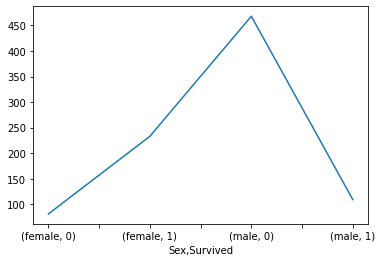

In [9]:
train.groupby(['Sex','Survived']).size().plot()

<Axes: xlabel='Sex,Survived'>

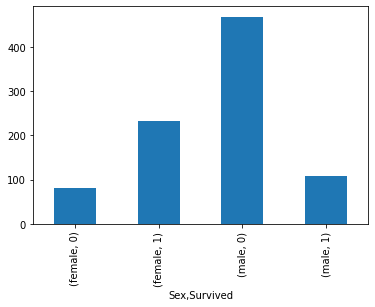

In [10]:
train.groupby(['Sex','Survived']).size().plot(kind='bar')

<Axes: xlabel='Sex,Survived'>

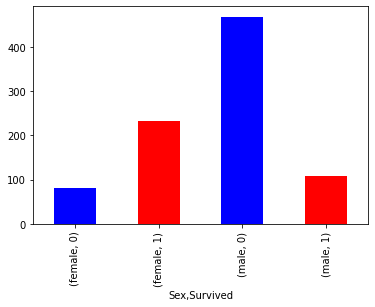

In [11]:
train.groupby(['Sex','Survived']).size().plot(kind='bar', color=['blue', 'red', 'blue', 'red'])

In [12]:
train.value_counts(subset=['Sex', 'Survived'])

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [13]:
train.value_counts(subset=['Sex', 'Survived']).sort_index()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

<Axes: xlabel='Sex,Survived'>

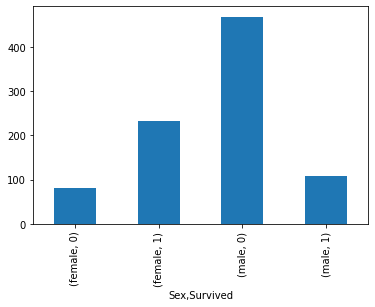

In [14]:
train.value_counts(subset=['Sex', 'Survived']).sort_index().plot(kind='bar')

승선 항구 정보 더 자세히 보기

In [15]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train.groupby(['Embarked','Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

<Axes: xlabel='Embarked,Survived'>

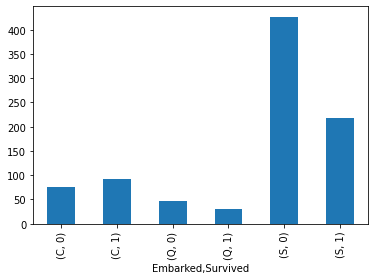

In [17]:
train.groupby(['Embarked','Survived']).size().plot(kind='bar')

# 모델 빌딩

## 트레이닝 셋 전처리

*   Sex라는 컬럼은 문자열 타입이며 머신러닝 알고리즘들은 숫자타입 밖에 이해하지 못함
*   이를 숫자 타입으로 변환. male은 1로 female은 0으로 변환
*   보통 Scikit Learn에서는 이를 StringIndexer라는 모듈로 변환해줌.

여기서는 조금더 간단하게 numpy의 where를 이용해 Gender라는 새로운 컬럼을 생성

In [18]:
train['Gender'] = np.where(train['Sex'] == 'male', 1, 0)

In [19]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1


In [20]:
# Gender 1 (Male) and Survived 1 negatively correlated 
train["Gender"].corr(train["Survived"]) 

-0.5433513806577555

### 기타 필드들 상관 관계 보기

In [21]:
train["Pclass"].corr(train["Survived"]) 

-0.33848103596101475

In [24]:
train["SibSp"].corr(train["Survived"]) 
# 0에 가깝기에 상관없다.

-0.035322498885735645

In [25]:
train["Parch"].corr(train["Survived"]) 
# 0에 가깝기에 상관없다.

0.08162940708348372

### Age 정보가 없는 승객 레코드 채우기


*   여기서는 dataframe의 fillna 함수를 이용해서 평균값으로 채움
*   Scikit-Learn에서는 Imputer라는 클래스를 이용하는 것이 일반적



In [26]:
train = train.fillna(value={'Age': 29.7})

In [27]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q,1


### 정규화

*   본 실습에서 하지는 않지만 숫자 값의 범위를 0과 1 혹은 -1과 1 처럼 특정 범위로 정규화하는 것이 
*   scikit-learn에서는 Scaler를 이용해 이를 수행한다

### 최종 트레이닝 셋 빌딩

In [28]:
train = train.drop(
  ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Parch', 'SibSp'],
  axis=1
)

In [29]:
train.head(10)

,Survived,Pclass,Age,Fare,Gender
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
5,0,3,29.7,8.4583,1
6,0,1,54.0,51.8625,1
7,0,3,2.0,21.0750,1
8,1,3,27.0,11.1333,0
9,1,2,14.0,30.0708,0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
 4   Gender    891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


## 모델 빌딩

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [32]:
# Logistic Regression 모델 만들기
lr = LogisticRegression(random_state=1)

## 두 가지 종류의 모델 성능 테스트

*   Hold out 테스트: train_test_split
*   Cross Validation 테스트: cross_validate

## Hold Out 테스트 (교차분석 테스트)

In [33]:
X = train[["Pclass", "Gender", "Age"]]
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
X_train.shape

(712, 3)

In [35]:
X_train.head(5)

,Pclass,Gender,Age
360,3,1,40.0
530,2,0,2.0
96,1,1,71.0
197,3,1,42.0
72,2,1,21.0


In [36]:
y_train.head(5)

360    0
530    1
96     0
197    0
72     0
Name: Survived, dtype: int64

In [37]:
log_reg = lr.fit(X_train, y_train)

## 모델 검증

In [38]:
from sklearn.metrics import classification_report

In [39]:
X_test.head()

,Pclass,Gender,Age
618,2,0,4.0
813,3,0,6.0
471,3,1,38.0
143,3,1,19.0
61,1,0,38.0


In [40]:
y_test.head()

618    1
813    0
471    0
143    0
61     1
Name: Survived, dtype: int64

In [41]:
expected   = y_test
predicted  = log_reg.predict(X_test)

In [42]:
predicted

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0])

In [43]:
predicted_prob = log_reg.predict_proba(X_test)

In [44]:
predicted_prob

array([[0.09728375, 0.90271625],
       [0.2528318 , 0.7471682 ],
       [0.92589435, 0.07410565],
       [0.87419384, 0.12580616],
       [0.09446225, 0.90553775],
       [0.89610861, 0.10389139],
       [0.89894845, 0.10105155],
       [0.43028176, 0.56971824],
       [0.0598387 , 0.9401613 ],
       [0.13847466, 0.86152534],
       [0.89610861, 0.10389139],
       [0.90307902, 0.09692098],
       [0.09446225, 0.90553775],
       [0.41296435, 0.58703565],
       [0.17982253, 0.82017747],
       [0.17531319, 0.82468681],
       [0.20372828, 0.79627172],
       [0.40029905, 0.59970095],
       [0.47431614, 0.52568386],
       [0.16209247, 0.83790753],
       [0.41296435, 0.58703565],
       [0.48973466, 0.51026534],
       [0.35675059, 0.64324941],
       [0.21393041, 0.78606959],
       [0.05172046, 0.94827954],
       [0.24704308, 0.75295692],
       [0.90442203, 0.09557797],
       [0.41296435, 0.58703565],
       [0.7938852 , 0.2061148 ],
       [0.90627428, 0.09372572],
       [0.

In [45]:
predicted_prob = log_reg.predict_proba(X_test)[:,1]

In [46]:
predicted_prob

array([0.90271625, 0.7471682 , 0.07410565, 0.12580616, 0.90553775,
       0.10389139, 0.10105155, 0.56971824, 0.9401613 , 0.86152534,
       0.10389139, 0.09692098, 0.90553775, 0.58703565, 0.82017747,
       0.82468681, 0.79627172, 0.59970095, 0.52568386, 0.83790753,
       0.58703565, 0.51026534, 0.64324941, 0.78606959, 0.94827954,
       0.75295692, 0.09557797, 0.58703565, 0.2061148 , 0.09372572,
       0.95263887, 0.09372572, 0.74161114, 0.27296605, 0.18612794,
       0.09372572, 0.08786456, 0.90539455, 0.51797888, 0.34563556,
       0.3386852 , 0.92529929, 0.26088294, 0.12924167, 0.10978327,
       0.33180374, 0.62895511, 0.09372572, 0.2981531 , 0.10978327,
       0.09372572, 0.12580616, 0.11596605, 0.30465487, 0.23388233,
       0.50069678, 0.83768019, 0.49482727, 0.09372572, 0.10105155,
       0.58703565, 0.25529071, 0.10978327, 0.58703565, 0.15557544,
       0.71690665, 0.26120564, 0.15557544, 0.09828081, 0.09372572,
       0.67106662, 0.12580616, 0.91068986, 0.47400695, 0.46985

In [47]:
classificationReport = classification_report(expected, predicted)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       114
           1       0.67      0.71      0.69        65

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [48]:
# 예측되는 값은 0 혹은 1이 되며 0은 생존하지 못했음을 나타내고 1은 생존했음을 나타낸다. 이걸 더 분명하게 하고 싶다면 
# target_names 컬럼을 이용해 0을 Died로 표현하고 1을 Survived로 표현하자

classificationReport = classification_report(expected, predicted, target_names=["Died", "Survived"])
print(classificationReport)

              precision    recall  f1-score   support

        Died       0.83      0.80      0.81       114
    Survived       0.67      0.71      0.69        65

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



## ROC 커브 그려보고 AUC 계산해보기

*   https://nittaku.tistory.com/295, https://nittaku.tistory.com/297 참조


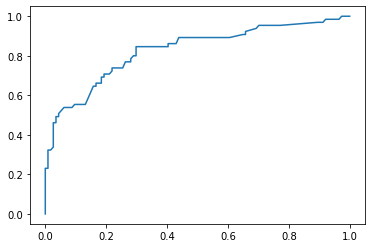

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr,tpr,_ = roc_curve(expected, predicted_prob)
plt.plot(fpr,tpr)

In [50]:
auc(fpr, tpr)

0.8268556005398111

## 예측 테스트

In [53]:
# Pclass	Gender	Age
test = [
    [1, 0, 80],
    [3, 1, 75]
]
print(log_reg.predict(test))

[1 0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
print(log_reg.predict_proba(test))

[[0.27619915 0.72380085]
 [0.97510324 0.02489676]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 보너스 나이 (age) 시각화

<Axes: >

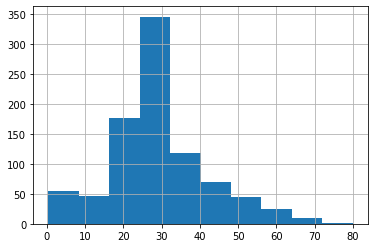

In [55]:
train["Age"].hist()

<Axes: ylabel='Frequency'>

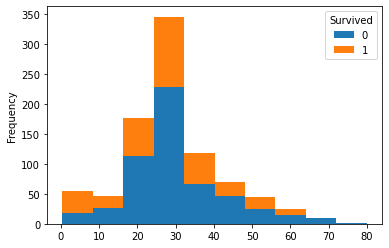

In [56]:
train.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True)